For this lab, we will explore single variable linear regression with the built-in diabetes dataset from scikit-learn (sklearn). 



# Import Libraries

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

Background: 

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline. [https://scikit-learn.org/stable/datasets/toy_dataset.html]

Attribute information



1.   age (age in years)
2.   sex
3.   bmi (body mass index)
4.   bp (average blood pressure)
5.   s1 tc, total serum cholesterol
6.   s2 ldl, low-density lipoproteins
7.   s3 hdl, high-density lipoproteins
8.   s4 tch, total cholesterol / HDL
9.   s5 ltg, possibly log of serum triglycerides level
10.  s6 glu, blood sugar level

Target information


1.   quantitative measure of disease progression one year after baseline





In [4]:
from sklearn.datasets import load_diabetes

In [5]:
(data, target) = load_diabetes(return_X_y= True, as_frame=True)

Display the first 5 observations of the 'data' dataframe

In [7]:
data.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Display the attribute names (column names) of this 'data' matrix

In [8]:
list(data.columns.values)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Display the first 5 observations in the 'target' matrix

In [9]:
target.head(5)

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

# Finding Linearly Correlated Variable Pairs 

Generate the correlation coefficients for every variable pair in the 'data' dataframe

In [17]:
datacc = data.corr()
datacc

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


Create a heatmap visualization of the correlation matrix with appropriate labels and colormap selection to reflect the data to be shown 

(Display the correlation coefficient in each square and use a diverging color map centered at 0)

<AxesSubplot: >

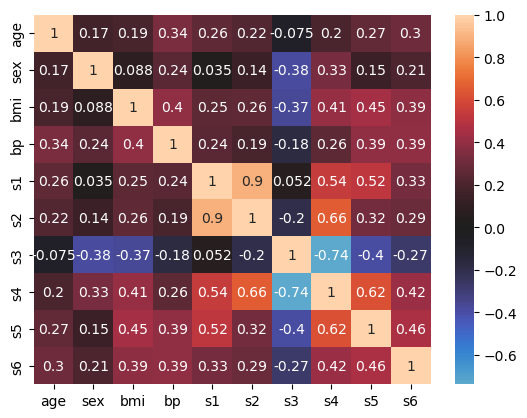

In [16]:
sns.heatmap(datacc, vmin=None, vmax=None, cmap=None, center=0,robust=False, annot=True)

Based on your heatmap, what are the top 3 correlated variable pairs and their correlation coefficient? Write your answer as a comment in a cell below

In [ ]:
# 1. s1 and s2 with a correlation coefficient of .9
# 2. s3 and s4 with a correlation coefficient of -.74
# 3. s2 and s4 with a correlation coefficient of .66

# Plotting Best Fit Line

Choose one of the top 3 correlated variable pairs you have listed above and find the equation for the best fit line

In [53]:
from sklearn.linear_model import LinearRegression
X = data['s1'].to_numpy().reshape(-1, 1)
Y = data['s2']
model = LinearRegression().fit(X,Y)
model.coef_ , model.intercept_

(array([0.89666296]), 5.1571733982230335e-17)

In [ ]:
#The best fit line for the variables s1 and s2 has a slope of 0.8967 and a y-intercept of appoximately 0.

Visualize the relationship between the two variables you have chosen (create a scatterplot)

<AxesSubplot: xlabel='s1', ylabel='s2'>

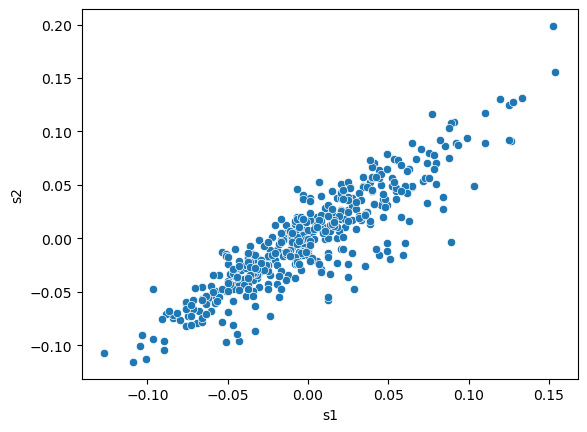

In [39]:
sns.scatterplot(data, x="s1", y="s2")

Generate a plot with the best fit line

<AxesSubplot: xlabel='s1', ylabel='s2'>

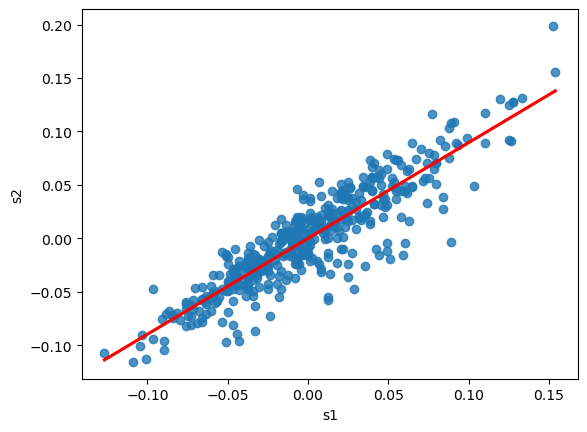

In [43]:
sns.regplot(data, x='s1',y='s2', ci=None, line_kws={'color':'red'})

# Training Linear Regression Model

With your chosen variable pair, train a linear regression model with the data associated with that pair

In [54]:
X = data[["s1"]]
Y = data["s2"]
model = LinearRegression().fit(X,Y)

In [55]:
model.coef_ , model.intercept_

(array([0.89666296]), 5.1571733982230335e-17)

What is the equation of the best fit line?

In [56]:
#The equation of the best fit line is: y = 0.89666296x + 5.1571733982230335e-17

# Testing New Data

Given the below list of new data, use the model to perform a prediction 

Hint: You can input this list into model.predict() as a parameter. Don't forget to reshape your list before inputting as a parameter.

In [57]:
new_data = [-0.09, 0.01, 0.05, 0.13, 0.15, 0.17]

In [62]:
newdata = np.reshape(new_data, (-1,1))
predicted = model.predict(newdata)
predicted

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.08069967,  0.00896663,  0.04483315,  0.11656618,  0.13449944,
        0.1524327 ])

Plot your newly predicted data onto a scatterplot with the best fit line

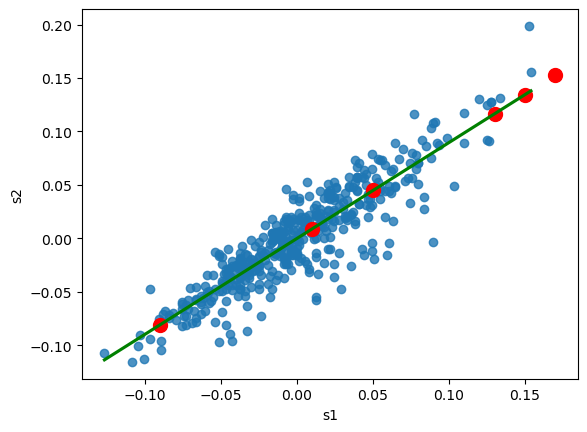

In [67]:
sns.regplot(data, x='s1', y='s2', ci=None, line_kws={'color':'green'})
plt.scatter(x=new_data, y = predicted, color='r', s=100)

# Exploring Metrics

Find the mean square error (MSE) between the known data and the predicted data

In [69]:
from sklearn.metrics import mean_squared_error as mse

Create a variable called y_known. Assign the 'target' matrix to it.

In [82]:
y_known = target

In [77]:
# GIVEN: Run this cell of code
# The model is asked to make predictions with data that already have an 'answer'
# We already know what is the expected 'answer' from the target matrix
# We want to compare the model's prediction against the 'answer key'
y_pred=model.predict(X)

Use the built-in function to calculate the MSE. First parameter is the known data, second parameter is the predicted data.

Don't be alarmed if you calculate out a large number. We will address why this happens in later lectures.

In [81]:
mse(y_known,y_pred)

29073.091033710938

Run the below code and observe. This is called the R2 score. It is another metric of 'goodness' for a model. 'High' or 'low' values are dependent on the context of the data. The higher the R2 score is, the more closely the datapoints 'adhere' to the model.

In [83]:
model.score(X,Y)

0.8040044599094562

In [84]:
#The R2 scores is 0.8040, which highlights that the datapoints adhere to the model fairly well. 